# Naive Bayes

In [3]:
import numpy as np

In [4]:
def my_gpdf(x,mean,std):
    exp=np.exp(-((x-mean)**2/(2*std*2)))
    return (1/(np.sqrt(2*np.pi)*std))*exp

In [5]:
child_age=[8,5,6,4,3]
child_h=[60,70,54,67,75]
adult_age=[27,30,32,24,23]
adult_h=[160,172,180,156,166]

mca=np.mean(child_age)
mch=np.mean(child_h)
sca=np.std(child_age)
sch=np.std(child_h)

maa=np.mean(adult_age)
mah=np.mean(adult_h)
saa=np.std(adult_age)
sah=np.std(adult_h)


In [6]:
test=[35,178]

In [7]:
result1= my_gpdf(test[0],mca,sca)*my_gpdf(test[1],mch,sch)*0.5
result1

2.5577284786842453e-245

# Naive Bayes Implementation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
# To Enable plotting graphs in Jupyter Notebook
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [9]:
col=["Preg","Glc","BP","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
data=pd.read_csv("pima-indians-diabetes-1.data",names=col)

In [10]:
data.head()

,Preg,Glc,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
y=data["Outcome"]
x=data.drop(columns="Outcome")
x_std=StandardScaler().fit_transform(x)      
# scaling of Input, don't scale output(because it is categorical), we can also use Z score, this is another method


x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.3,random_state=2)

In [12]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [13]:
ypred=model.predict(x_test)

In [14]:
metrics.accuracy_score(y_test,ypred)

0.7705627705627706

In [15]:
pd.crosstab(y_test,ypred)

col_0,0,1
Outcome,,
0,136,19
1,34,42


In [16]:
print(metrics.confusion_matrix(y_test,ypred))

[[136  19]
 [ 34  42]]


In [25]:
ypred=model.predict(x_test)


In [26]:
from sklearn import metrics

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

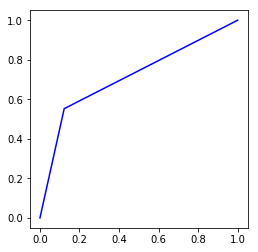

In [29]:
fpr,tpr,threshold=metrics.roc_curve(y_test,ypred)   # fpr -False posititve Ratio, tpr- True positive ratio
plt.plot(fpr,tpr,label="ROC curve",color="b")
plt.axes().set_aspect("equal")
plt.xlim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1
plt.ylim([-0.05,1.05]) 

In [30]:
metrics.auc(fpr,tpr)  # Area Under the curve

0.7150254668930391